<a href="https://colab.research.google.com/github/sahupra1357/tensorflow/blob/main/DifferenceKerasTensorflowHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackoverflow.com/questions/60251715/difference-between-keras-and-tensorflow-hub-version-of-mobilenetv2/60284154#60284154

In [ ]:
!pip install tensorflow-gpu==2.1.0
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
def create_model_keras():
  image_input = tf.keras.Input(shape=(224, 224, 3))
  out = MobileNetV2(input_shape=(224, 224, 3),
                  include_top=True)(image_input)
  model = tf.keras.models.Model(inputs=image_input, outputs=out)
  model.compile(optimizer='adam', loss=["categorical_crossentropy"])
  return model

def create_model_tf():
  image_input = tf.keras.Input(shape=(224, 224 ,3))
  out = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                      input_shape=(224, 224, 3))(image_input)
  model = tf.keras.models.Model(inputs=image_input, outputs=out)
  model.compile(optimizer='adam', loss=["categorical_crossentropy"])
  return model

In [ ]:
keras_model = create_model_keras()
tf_model = create_model_tf()
np.random.seed(42)
data = np.random.rand(32,224,224,3)
out_keras = keras_model.predict_on_batch(data)
out_tf = tf_model.predict_on_batch(data)
np.array_equal(out_keras, out_tf)

False

In [ ]:
np.sum(out_keras[0]), np.sum(out_tf[0])

(1.0000001, -14.166359)

In [ ]:
out_keras[0].shape, out_tf[0].shape

(TensorShape([1000]), TensorShape([1001]))

###EDIT 18.02.2020

In [ ]:
!wget "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/1024px-Grosser_Panda.JPG"
!mv /content/1024px-Grosser_Panda.JPG panda.jpeg

--2020-02-18 18:31:21--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/1024px-Grosser_Panda.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154112 (150K) [image/jpeg]
Saving to: ‘1024px-Grosser_Panda.JPG’

1024px-Grosser_Pand 100%[===================>] 150.50K  --.-KB/s    in 0.04s   

2020-02-18 18:31:21 (3.72 MB/s) - ‘1024px-Grosser_Panda.JPG’ saved [154112/154112]



In [ ]:
def create_model_keras():
  image_input = tf.keras.Input(shape=(224, 224, 3))
  out = MobileNetV2(input_shape=(224, 224, 3),
                  include_top=True)(image_input)
  model = tf.keras.models.Model(inputs=image_input, outputs=out)
  model.compile(optimizer='adam', loss=["categorical_crossentropy"])
  return model

def create_model_tf():
  image_input = tf.keras.Input(shape=(224, 224 ,3))
  x = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                      input_shape=(224, 224, 3))(image_input)
  out = tf.keras.layers.Softmax()(x)
  model = tf.keras.models.Model(inputs=image_input, outputs=out)
  model.compile(optimizer='adam', loss=["categorical_crossentropy"])
  return model

In [ ]:
keras_model = create_model_keras()
tf_model = create_model_tf()
np.random.seed(42)
tf_data = np.random.rand(32,224,224,3)
keras_data = tf_data*2 -1
out_keras = keras_model.predict_on_batch(keras_data)
out_tf = tf_model.predict_on_batch(tf_data)
np.allclose(out_keras, out_tf[:,1:], rtol=0.01), np.allclose(out_keras, out_tf[:,1:], rtol=8)

(True, True)

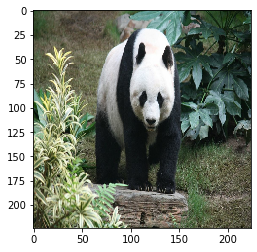

In [ ]:
import matplotlib.pyplot as plt
tf_data = np.zeros((1,224,224,3))
img = tf.io.read_file("/content/panda.jpeg")
img = tf.image.decode_jpeg(img)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, (224,224))
tf_data[0] = img
plt.imshow(img)

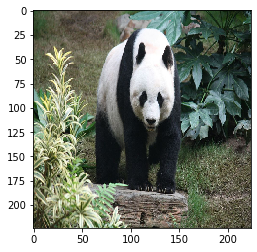

In [ ]:
keras_data = np.zeros((1,224,224,3))
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
img = tf.keras.preprocessing.image.load_img("/content/panda.jpeg", target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = preprocess_input(img)
keras_data[0] = img
plt.imshow((img +1)/2 )

In [ ]:
out_tf = tf_model.predict_on_batch(tf_data)
out_keras = keras_model.predict_on_batch(keras_data)
np.allclose(out_keras, out_tf[:,1:], rtol=0.8)

True

In [ ]:
out_keras[0][:10], out_tf[0][1:11]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([2.2964334e-05, 2.6945625e-05, 3.4621811e-05, 1.0440075e-04,
        3.6077661e-05, 1.0716339e-05, 3.9093982e-05, 1.3140142e-05,
        2.6737845e-05, 6.3674606e-06], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([2.3479219e-05, 3.0661860e-05, 2.7725315e-05, 8.1575781e-05,
        3.0485984e-05, 9.2455493e-06, 3.6680824e-05, 9.3693980e-06,
        2.3095839e-05, 5.9981589e-06], dtype=float32)>)

In [ ]:
np.argmax(out_keras[0]), np.argmax(out_tf[0])

(388, 389)